## Creating a classification model

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import gensim
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

C:\Users\91976\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#Importing the dataset

df = pd.read_csv("C:/Users/91976/Downloads/root2ai - Data.csv")     

In [3]:
df.head(10)

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
5,agarwal head bank,Blockchain
6,several data security regulatory oversight wou...,Blockchain
7,relevance transaction register available publi...,Blockchain
8,technology need transaction intermediary clear...,Blockchain
9,seven bank morgan chase already support certai...,Blockchain


### Data pre-processing and Analysis

In [4]:
df.shape

(22704, 2)

In [5]:
df.info()   #Checking for the Data types and number of values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [6]:
df['Target'].value_counts()    #Counting the values of each class of the target column from the dataset

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [7]:
df.isna().sum()   #Checking for null rows in the data 

Text      3
Target    0
dtype: int64

In [8]:
df = df.dropna()     #We are dropping the na rows as they are very less in the numbers

#df = df.fillna('')  #We can fill them using this command

In [9]:
df.isna().sum()       #Again checking for null rows in the data 

Text      0
Target    0
dtype: int64

C:\Users\91976\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


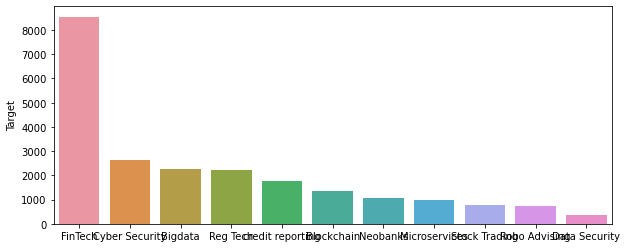

In [10]:
#Visualizing the target variable in the dataset

x = df['Target'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x.index, x)
plt.show()

In [11]:
#Changing the data type and assigning the number to each class of the target variable from the data

from sklearn.preprocessing import LabelEncoder

In [12]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [13]:
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,1
1,director could play role financial system,1
2,preliminary discuss secure transaction study r...,1
3,security indeed prove essential transforming f...,1
4,bank settlement normally take three days based...,1


In [14]:
df.tail(10)

,Text,Target
22694,third final section book presents four case st...,7
22695,Each study illustrates improved results achiev...,7
22696,questions Kaldero poses case studies good food...,7
22697,instance first study focuses question bank ind...,7
22698,third tackles problem traffic congestion overc...,7
22699,fourth study discusses blockchain technology e...,7
22700,book finishes stating biggest issue emerging F...,7
22701,people culture cess,7
22702,author challenges execu tive lead change stop ...,7
22703,change data driven culture come bottom must start,7


""""As we can see that the given dataset is already in the lower case, without any punctuation and does not contain any Stopwords such as 'is','you','he','the' etc. So we don't have to do text pre-processing""""

In [15]:
#Splitting the training dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], test_size=0.2)

In [16]:
#Extracting vectors from text

X_train_tok = [nltk.word_tokenize(i) for i in X_train]
X_test_tok = [nltk.word_tokenize(i) for i in X_test]

In [17]:
#Vectorization using Tf-Idf and Word2Vec

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

### Fitting machine learning algorithms

In [18]:
#Fitting the classification model using Logistic Regression

model_LR = LogisticRegression()
model_LR.fit(X_train_vectors_tfidf, y_train)

C:\Users\91976\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#Making predictions using logistic regression

y_predict = model_LR.predict(X_test_vectors_tfidf)     

In [20]:
 #Confusion matrix

print(confusion_matrix(y_test,y_predict))             

[[ 302    0    5    0  121    3    0   19    0    0    3]
 [   8   92   14    0  154    2    0    0    0    1    2]
 [   1    5  247    4  222    6    1    2    1    1    4]
 [   0    0   21    3   30    1    0    0    0    0    5]
 [  27   13   49    0 1610   10    7    5    6   10   31]
 [   4    1    3    0  107   78    0    0    0    0    0]
 [   2    0    4    0  175    1   30    1    2    0    7]
 [  25    0   13    0   95    0    1  302    0    0    0]
 [   1    2    6    0   92    0    1    0   41    2    1]
 [   3    0    6    0   67    0    0    0    1   66    0]
 [   7    5   14    2  133    0    0    0    0    1  191]]


In [21]:
#Classification report

print(classification_report(y_test,y_predict))            

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       453
           1       0.78      0.34      0.47       273
           2       0.65      0.50      0.56       494
           3       0.33      0.05      0.09        60
           4       0.57      0.91      0.70      1768
           5       0.77      0.40      0.53       193
           6       0.75      0.14      0.23       222
           7       0.92      0.69      0.79       436
           8       0.80      0.28      0.42       146
           9       0.81      0.46      0.59       143
          10       0.78      0.54      0.64       353

    accuracy                           0.65      4541
   macro avg       0.72      0.45      0.52      4541
weighted avg       0.69      0.65      0.63      4541



In [22]:
#Accuracy of the model

print("Accuracy : {}".format(accuracy_score(y_test,y_predict)))        

Accuracy : 0.652279233648976


In [23]:
#Fitting Naive Bayes model

model_NB = MultinomialNB()
model_NB.fit(X_train_vectors_tfidf, y_train)

MultinomialNB()

In [24]:
y_predict = model_NB.predict(X_test_vectors_tfidf)       

In [25]:
 #Confusion matrix

print(confusion_matrix(y_test,y_predict))               

[[ 222    0    1    0  207    0    0   23    0    0    0]
 [   0   16    2    0  254    0    0    0    0    0    1]
 [   0    0  129    0  364    0    0    0    0    0    1]
 [   0    0    8    0   52    0    0    0    0    0    0]
 [   3    0    7    0 1755    0    0    0    0    0    3]
 [   0    0    0    0  183   10    0    0    0    0    0]
 [   0    0    1    0  218    0    2    1    0    0    0]
 [   8    2    7    0  152    0    0  267    0    0    0]
 [   0    0    2    0  144    0    0    0    0    0    0]
 [   0    0    0    0  131    0    0    0    0   12    0]
 [   1    1    8    0  311    0    0    0    0    0   32]]


In [26]:
 #Classification report

print(classification_report(y_test,y_predict))          

              precision    recall  f1-score   support

           0       0.95      0.49      0.65       453
           1       0.84      0.06      0.11       273
           2       0.78      0.26      0.39       494
           3       0.00      0.00      0.00        60
           4       0.47      0.99      0.63      1768
           5       1.00      0.05      0.10       193
           6       1.00      0.01      0.02       222
           7       0.92      0.61      0.73       436
           8       0.00      0.00      0.00       146
           9       1.00      0.08      0.15       143
          10       0.86      0.09      0.16       353

    accuracy                           0.54      4541
   macro avg       0.71      0.24      0.27      4541
weighted avg       0.69      0.54      0.45      4541



C:\Users\91976\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#Accuracy of the model

print("Accuracy : {}".format(accuracy_score(y_test,y_predict)))       

Accuracy : 0.5384276591059238


In [28]:
#Building a support vector machine algorithm

from sklearn import svm
from sklearn.svm import SVC

In [29]:
#Fitting of the svm model
clf = SVC()
clf.fit(X_train_vectors_tfidf, y_train)         

SVC()

In [30]:
#Making the predictions

y_predict = clf.predict(X_test_vectors_tfidf)    

In [31]:
 #Confusion matrix

print(confusion_matrix(y_test,y_predict))        

[[ 312    0    3    0  122    0    0   15    0    0    1]
 [   6   83    8    0  172    1    0    0    0    1    2]
 [   5    1  226    1  251    4    0    0    0    0    6]
 [   0    0   19    3   36    0    0    0    0    0    2]
 [  20    7   21    0 1679    5    1    2    3    6   24]
 [   5    0    3    0  117   68    0    0    0    0    0]
 [   0    1    1    0  177    0   35    1    0    1    6]
 [  24    0    6    0   91    0    0  315    0    0    0]
 [   2    1    2    0  107    0    1    0   31    1    1]
 [   2    0    1    0   76    0    0    0    0   64    0]
 [   5    2   10    1  136    0    0    0    0    1  198]]


In [32]:
#Classification report

print(classification_report(y_test,y_predict))     

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       453
           1       0.87      0.30      0.45       273
           2       0.75      0.46      0.57       494
           3       0.60      0.05      0.09        60
           4       0.57      0.95      0.71      1768
           5       0.87      0.35      0.50       193
           6       0.95      0.16      0.27       222
           7       0.95      0.72      0.82       436
           8       0.91      0.21      0.34       146
           9       0.86      0.45      0.59       143
          10       0.82      0.56      0.67       353

    accuracy                           0.66      4541
   macro avg       0.82      0.45      0.52      4541
weighted avg       0.74      0.66      0.64      4541



In [33]:
#Accuracy of the model

print("Accuracy : {}".format(accuracy_score(y_test,y_predict)))

Accuracy : 0.6637304558467298


In [34]:
#Building a Neural Network model

from sklearn.neural_network import MLPClassifier

In [35]:
model_NN = MLPClassifier(hidden_layer_sizes = (200,200))

In [36]:
model_NN.fit(X_train_vectors_tfidf, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200))

In [37]:
y_predict = model_NN.predict(X_test_vectors_tfidf)

In [38]:
#Confusion matrix

print(confusion_matrix(y_test,y_predict))

[[ 331    6   13    0   63    2    3   26    3    0    6]
 [   3  140   24    4   73    2    8    0    7    4    8]
 [   6   29  287   12  109   13    7    1   14    6   10]
 [   1    2   17    8   17    3    1    1    5    1    4]
 [  22   74  163   19 1204   42   69    8   65   42   60]
 [   2    8   12    3   55   99    4    0    3    1    6]
 [   2    6   11    2   84    8   98    0    8    2    1]
 [  39    8   10    0   33    1    1  337    4    1    2]
 [   4    7    9    1   44    0    5    0   74    1    1]
 [   2    2    7    2   26    4    2    0    5   90    3]
 [   5   19   23    6   85    3    6    1    5    2  198]]


In [39]:
#Classification report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       453
           1       0.47      0.51      0.49       273
           2       0.50      0.58      0.54       494
           3       0.14      0.13      0.14        60
           4       0.67      0.68      0.68      1768
           5       0.56      0.51      0.54       193
           6       0.48      0.44      0.46       222
           7       0.90      0.77      0.83       436
           8       0.38      0.51      0.44       146
           9       0.60      0.63      0.61       143
          10       0.66      0.56      0.61       353

    accuracy                           0.63      4541
   macro avg       0.56      0.55      0.55      4541
weighted avg       0.64      0.63      0.63      4541



In [40]:
#Accuracy of the model

print("Accuracy : {}".format(accuracy_score(y_test,y_predict)))

Accuracy : 0.6311385157454306


### Conclusion : As from above we can clearly see that the Logistic regression and Support vector machine both model gave the better accuracy than any other model. So we can classify using any of the model.